<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.276544,78.300296,59.231361,64.291010,-0.000118,263.099093,263.099113,-0.000020
1,0.0,1.0,25.566537,38.034113,65.280031,60.491117,0.000274,199.372072,199.371619,0.000454
2,0.0,2.0,74.957970,65.070051,89.448535,29.484676,0.000235,268.961467,268.961704,-0.000236
3,0.0,3.0,36.195062,39.067899,98.809038,43.337745,-0.000451,227.409293,227.409710,-0.000417
4,0.0,4.0,70.060310,69.334225,82.265525,61.031180,0.001318,292.692558,292.691568,0.000990
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,23.316931,85.399400,94.261788,58.362126,0.000411,271.340655,271.339665,0.000990
29996,999.0,26.0,53.329062,73.089400,34.569009,25.342951,0.000258,196.330679,196.331296,-0.000617
29997,999.0,27.0,46.421983,35.987925,68.804528,57.908870,0.001246,219.124553,219.123022,0.001531
29998,999.0,28.0,97.195599,79.282901,87.772103,46.686563,0.000098,320.937264,320.938209,-0.000945


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.276544,78.300296,59.231361,64.291010,-0.000118,263.099093,263.099113,-0.000020
1,0.0,1.0,25.566537,38.034113,65.280031,60.491117,0.000274,199.372072,199.371619,0.000454
2,0.0,2.0,74.957970,65.070051,89.448535,29.484676,0.000235,268.961467,268.961704,-0.000236
3,0.0,3.0,36.195062,39.067899,98.809038,43.337745,-0.000451,227.409293,227.409710,-0.000417
4,0.0,4.0,70.060310,69.334225,82.265525,61.031180,0.001318,292.692558,292.691568,0.000990
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,23.316931,85.399400,94.261788,58.362126,0.000411,271.340655,271.339665,0.000990
29996,999.0,26.0,53.329062,73.089400,34.569009,25.342951,0.000258,196.330679,196.331296,-0.000617
29997,999.0,27.0,46.421983,35.987925,68.804528,57.908870,0.001246,219.124553,219.123022,0.001531
29998,999.0,28.0,97.195599,79.282901,87.772103,46.686563,0.000098,320.937264,320.938209,-0.000945


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    51.276544  78.300296  59.231361  64.291010 -0.000118  263.099093   
      1.0    25.566537  38.034113  65.280031  60.491117  0.000274  199.372072   
      2.0    74.957970  65.070051  89.448535  29.484676  0.000235  268.961467   
      3.0    36.195062  39.067899  98.809038  43.337745 -0.000451  227.409293   
      4.0    70.060310  69.334225  82.265525  61.031180  0.001318  292.692558   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   23.316931  85.399400  94.261788  58.362126  0.000411  271.340655   
      26.0   53.329062  73.089400  34.569009  25.342951  0.000258  196.330679   
      27.0   46.421983  35.987925  68.804528  57.908870  0.001246  219.124553   
      28.0   97.195599  79.282901  87.772103  46.686563  0.000098  320.937264   
      29.0   74.322194  46.239338  34.396212  84.828537  0.001541  249.787822   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    263.099113 -0.000020  
      1.0    199.371619  0.000454  
      2.0    268.961704 -0.000236  
      3.0    227.409710 -0.000417  
      4.0    292.691568  0.000990  
...                 ...       ...  
999.0 25.0   271.339665  0.000990  
      26.0   196.331296 -0.000617  
      27.0   219.123022  0.001531  
      28.0   320.938209 -0.000945  
      29.0   249.785750  0.002072  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    51.276544  78.300296  59.231361  64.291010 -0.000118  263.099093   
      1.0    25.566537  38.034113  65.280031  60.491117  0.000274  199.372072   
      2.0    74.957970  65.070051  89.448535  29.484676  0.000235  268.961467   
      3.0    36.195062  39.067899  98.809038  43.337745 -0.000451  227.409293   
      4.0    70.060310  69.334225  82.265525  61.031180  0.001318  292.692558   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   23.316931  85.399400  94.261788  58.362126  0.000411  271.340655   
      26.0   53.329062  73.089400  34.569009  25.342951  0.000258  196.330679   
      27.0   46.421983  35.987925  68.804528  57.908870  0.001246  219.124553   
      28.0   97.195599  79.282901  87.772103  46.686563  0.000098  320.937264   
      29.0   74.322194  46.239338  34.396212  84.828537  0.001541  249.787822   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    263.099113 -0.000020  
      1.0    199.371619  0.000454  
      2.0    268.961704 -0.000236  
      3.0    227.409710 -0.000417  
      4.0    292.691568  0.000990  
...                 ...       ...  
999.0 25.0   271.339665  0.000990  
      26.0   196.331296 -0.000617  
      27.0   219.123022  0.001531  
      28.0   320.938209 -0.000945  
      29.0   249.785750  0.002072  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.276544,78.300296,59.231361,64.291010,-0.000118,263.099093,263.099113,-0.000020
1,0.0,1.0,25.566537,38.034113,65.280031,60.491117,0.000274,199.372072,199.371619,0.000454
2,0.0,2.0,74.957970,65.070051,89.448535,29.484676,0.000235,268.961467,268.961704,-0.000236
3,0.0,3.0,36.195062,39.067899,98.809038,43.337745,-0.000451,227.409293,227.409710,-0.000417
4,0.0,4.0,70.060310,69.334225,82.265525,61.031180,0.001318,292.692558,292.691568,0.000990
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,23.316931,85.399400,94.261788,58.362126,0.000411,271.340655,271.339665,0.000990
29996,999.0,26.0,53.329062,73.089400,34.569009,25.342951,0.000258,196.330679,196.331296,-0.000617
29997,999.0,27.0,46.421983,35.987925,68.804528,57.908870,0.001246,219.124553,219.123022,0.001531
29998,999.0,28.0,97.195599,79.282901,87.772103,46.686563,0.000098,320.937264,320.938209,-0.000945


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    51.276544  78.300296  59.231361  64.291010 -0.000118  263.099093   
      1.0    25.566537  38.034113  65.280031  60.491117  0.000274  199.372072   
      2.0    74.957970  65.070051  89.448535  29.484676  0.000235  268.961467   
      3.0    36.195062  39.067899  98.809038  43.337745 -0.000451  227.409293   
      4.0    70.060310  69.334225  82.265525  61.031180  0.001318  292.692558   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   23.316931  85.399400  94.261788  58.362126  0.000411  271.340655   
      26.0   53.329062  73.089400  34.569009  25.342951  0.000258  196.330679   
      27.0   46.421983  35.987925  68.804528  57.908870  0.001246  219.124553   
      28.0   97.195599  79.282901  87.772103  46.686563  0.000098  320.937264   
      29.0   74.322194  46.239338  34.396212  84.828537  0.001541  249.787822   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    263.099113 -0.000020  
      1.0    199.371619  0.000454  
      2.0    268.961704 -0.000236  
      3.0    227.409710 -0.000417  
      4.0    292.691568  0.000990  
...                 ...       ...  
999.0 25.0   271.339665  0.000990  
      26.0   196.331296 -0.000617  
      27.0   219.123022  0.001531  
      28.0   320.938209 -0.000945  
      29.0   249.785750  0.002072  

[30000 rows x 8 columns]

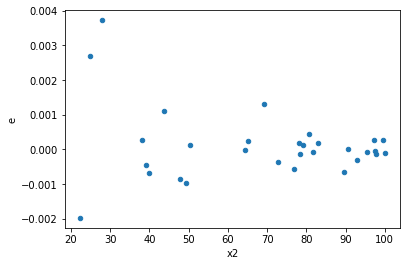

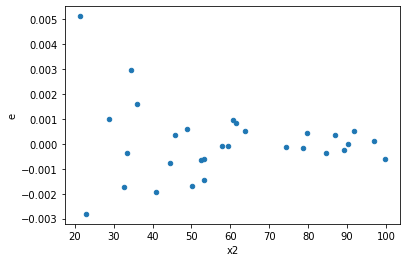

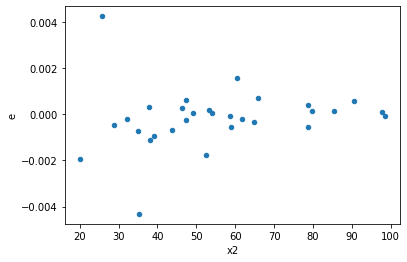

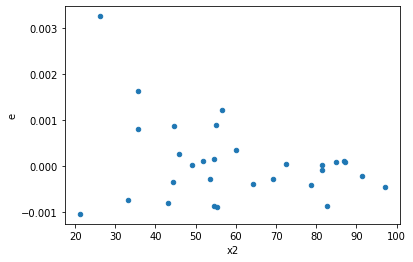

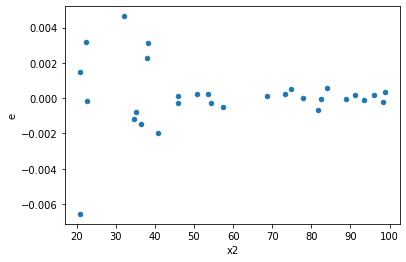

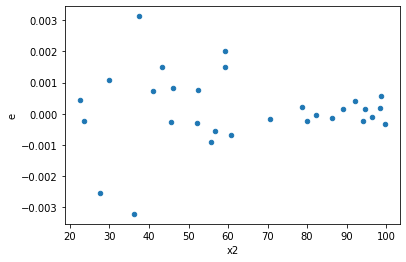

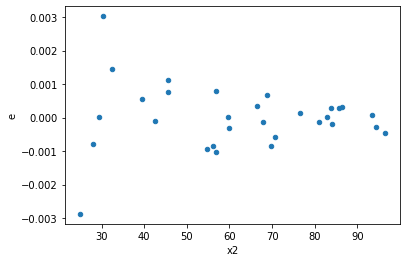

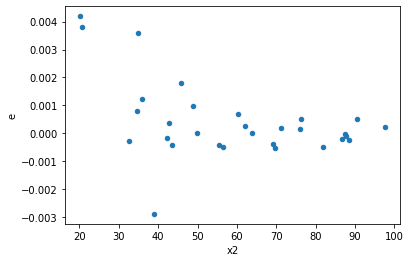

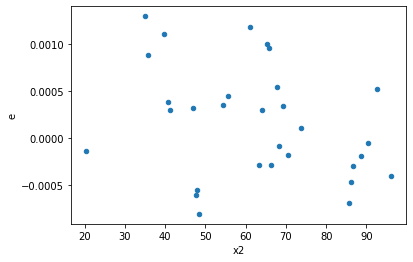

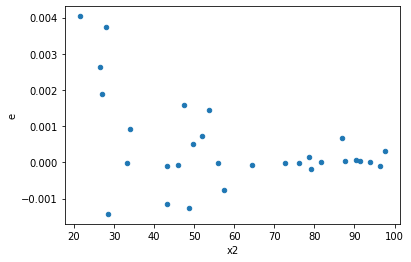

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,8.0,8.0,3.760458468099609e-06,1.4484453236834906e-05,4.700573085124511e-07,1.8105566546043633e-06,3.851778542352787,0.07393826295443984,0.9630308685227801,0.03696913147721992,Reject001=1 : Homoscedasticity
12.0,8.0,8.0,1.422653372099297e-06,4.429505000872476e-06,1.7783167151241213e-07,5.536881251090595e-07,3.113551823474896,0.12872639196116298,0.9356368040194185,0.06436319598058149,Reject001=1 : Homoscedasticity
17.0,8.0,8.0,2.676792648784395e-06,3.531984717018542e-06,3.3459908109804935e-07,4.4149808962731777e-07,1.3194838676139198,0.7043470846448163,0.6478264576775918,0.35217354232240816,Reject001=1 : Homoscedasticity
19.0,8.0,8.0,6.118532222530839e-06,1.0055773881478934e-05,7.648165278163549e-07,1.2569717351848667e-06,1.6434944715089714,0.4979537675479129,0.7510231162260436,0.24897688377395644,Reject001=1 : Homoscedasticity
23.0,8.0,8.0,8.748749284311348e-06,1.3126529443179737e-05,1.0935936605389184e-06,1.640816180397467e-06,1.5003892575500846,0.5793429831777948,0.7103285084111026,0.2896714915888974,Reject001=1 : Homoscedasticity
25.0,8.0,8.0,6.660339684431114e-06,8.09666875309091e-06,8.325424605538893e-07,1.0120835941363638e-06,1.2156540261778674,0.789091864091672,0.605454067954164,0.394545932045836,Reject001=1 : Homoscedasticity
29.0,8.0,8.0,2.695223564588033e-06,2.733426592397006e-06,3.3690294557350414e-07,3.4167832404962574e-07,1.0141743446855074,0.9846066734090322,0.5076966632954839,0.4923033367045161,Reject001=1 : Homoscedasticity
32.0,8.0,8.0,7.438746036777704e-06,2.8412329007543006e-05,9.29843254597213e-07,3.5515411259428758e-06,3.819505178301608,0.075643953861525,0.9621780230692375,0.0378219769307625,Reject001=1 : Homoscedasticity
37.0,8.0,8.0,4.7017359594196226e-06,2.3376947064007862e-05,5.877169949274528e-07,2.922118383000983e-06,4.971982107411555,0.035855090170522796,0.9820724549147386,0.017927545085261398,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,2.1877415519681272e-05,9.634536543696947e-07,2.734676939960159e-06,1.2043170679621184e-07,0.04403873270601623,0.00019994595005956117,Reject001=0 : Heteroscedasticity
1.0,8.0,8.0,5.309092872347001e-06,1.957728199018601e-06,6.636366090433751e-07,2.4471602487732514e-07,0.3687500381120936,0.17973180364414118,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,3.760458468099609e-06,1.4484453236834906e-05,4.700573085124511e-07,1.8105566546043633e-06,3.851778542352787,0.07393826295443984,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,1.1023406866876146e-05,2.323724931156613e-06,1.3779258583595182e-06,2.904656163945766e-07,0.2107991621119505,0.041144075993961554,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,5.645316353246463e-05,6.938991922824362e-07,7.056645441558079e-06,8.673739903530453e-08,0.012291590920026903,1.4777304626660284e-06,Reject001=0 : Heteroscedasticity
5.0,8.0,8.0,2.0203893894322972e-05,8.427795297613522e-06,2.5254867367903715e-06,1.0534744122016903e-06,0.4171371786891844,0.2376631505765436,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,2.1443089109806547e-05,2.4525008149805597e-06,2.6803861387258184e-06,3.0656260187256996e-07,0.1143725515676265,0.006012795641679014,Reject001=0 : Heteroscedasticity
7.0,8.0,8.0,1.9965531383188922e-05,7.293361195637972e-07,2.4956914228986152e-06,9.116701494547465e-08,0.036529762497476116,9.911582105279471e-05,Reject001=0 : Heteroscedasticity
8.0,8.0,8.0,2.902717022653961e-06,1.5940599630192707e-06,3.628396278317451e-07,1.9925749537740884e-07,0.5491613376635033,0.41462322212116065,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      600
Reject001=0 : Heteroscedasticity    400
Name: Result_test, dtype: int64